<a href="https://colab.research.google.com/github/plaban1981/Pharmaceutical-Classification/blob/master/Pharma_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement :

One of the challenge for all Pharmaceutical companies is to understand the persistencyof drug as per the physician prescription.

With an objective to gather insights on the factors that are impacting the persistency ,build a classification for the given dataset.


#### Target Varaiable : Persistency_Flag

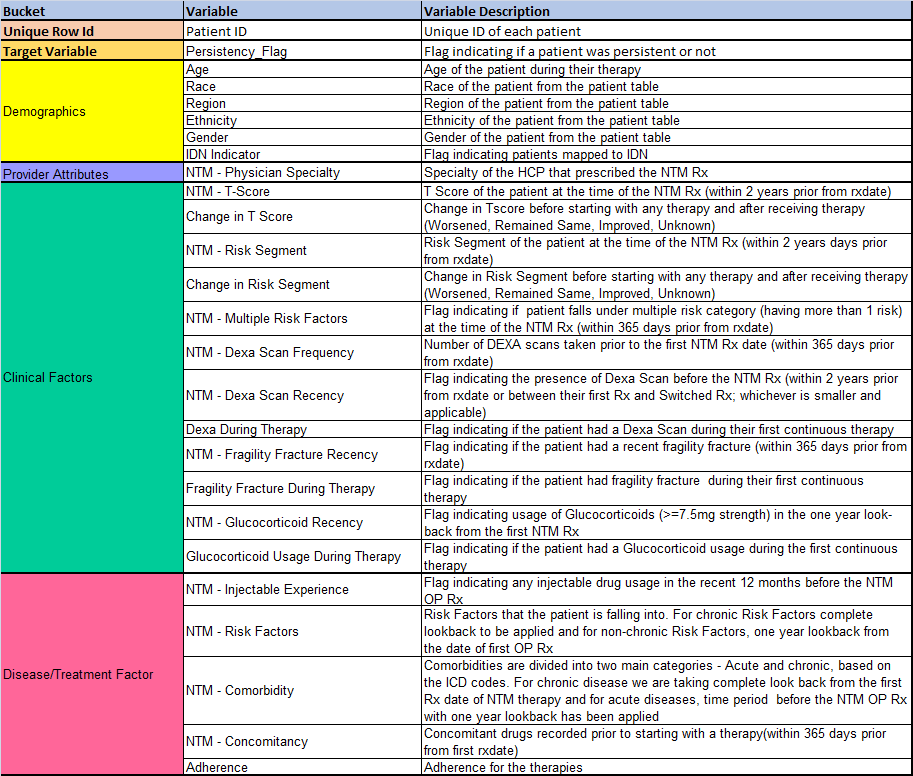

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Training Data

In [4]:
df = pd.read_csv('pharma.csv')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


## Check if the training dataset is balanced

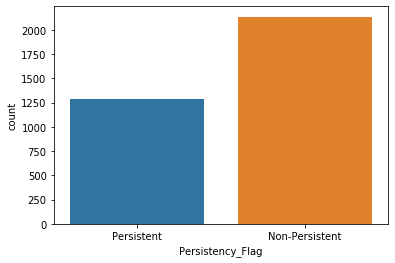

In [5]:
sns.countplot(x='Persistency_Flag',data=df)

## Check for Missing Values if any

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

## Datset Schema

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
Ptid                                                                  3424 non-null object
Persistency_Flag                                                      3424 non-null object
Gender                                                                3424 non-null object
Race                                                                  3424 non-null object
Ethnicity                                                             3424 non-null object
Region                                                                3424 non-null object
Age_Bucket                                                            3424 non-null object
Ntm_Speciality                                                        3424 non-null object
Ntm_Specialist_Flag                                                   3424 non-null object
Ntm_Speciality_Bucket                                                 3424

In [8]:
df.shape

(3424, 69)

## Selecting Features and Labels to be considered

In [0]:
X = df.drop(['Ptid','Persistency_Flag'],axis=1)
Y = df['Persistency_Flag']

## Label Encoding categorical Values

In [0]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in X.columns:
  X[col] = label_encoder.fit_transform(X[col])

In [12]:
X.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,2,1,4,3,5,0,1,0,0,0,0,0,0,1,1,2,0,1,2,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,4,0,5,0,1,0,0,0,0,0,0,1,1,1,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,1,5,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,0,2,1,0,3,5,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,2,1,0,3,5,0,1,1,1,0,0,0,0,0,0,1,2,2,2,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## Chi-Square Test for Feature Selection

A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

In [0]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,Y)

In [14]:
chi_scores

(array([3.45521380e-01, 1.19251638e-03, 5.03063429e-04, 3.54171421e+01,
        1.18833764e-02, 3.54213101e-01, 3.91097671e+01, 1.72590487e+01,
        8.68247655e-02, 1.14102634e+02, 8.09789507e+03, 6.01821735e+02,
        2.90232661e-04, 3.43856446e+01, 2.23056944e-01, 5.26354351e-01,
        9.43887166e-04, 4.93680192e+01, 7.49955094e+00, 2.08429398e-01,
        4.11367793e+01, 1.07671690e+01, 3.56031863e+00, 1.96456669e+02,
        1.89482869e+02, 1.74048681e+02, 6.94939799e+01, 1.31966226e+02,
        1.19920609e+02, 3.24413431e+02, 1.22614004e+02, 1.32550290e+02,
        1.77698458e+02, 4.43461277e+01, 4.90811420e+01, 8.48241176e+01,
        1.36023052e+02, 3.53410720e+01, 8.06936685e+01, 1.44555145e+02,
        2.98508448e+01, 9.66159106e+01, 1.38458954e+02, 1.40114405e+02,
        1.16851453e+02, 1.44635050e+02, 1.51679540e+02, 1.22724697e+00,
        2.37703404e-02, 9.53761404e+00, 1.20749415e+00, 1.50610840e+01,
        9.50813616e-02, 2.18812761e-01, 2.67234717e+01, 7.138512

#### Here first array represents chi square values and second array represnts p-values

In [0]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

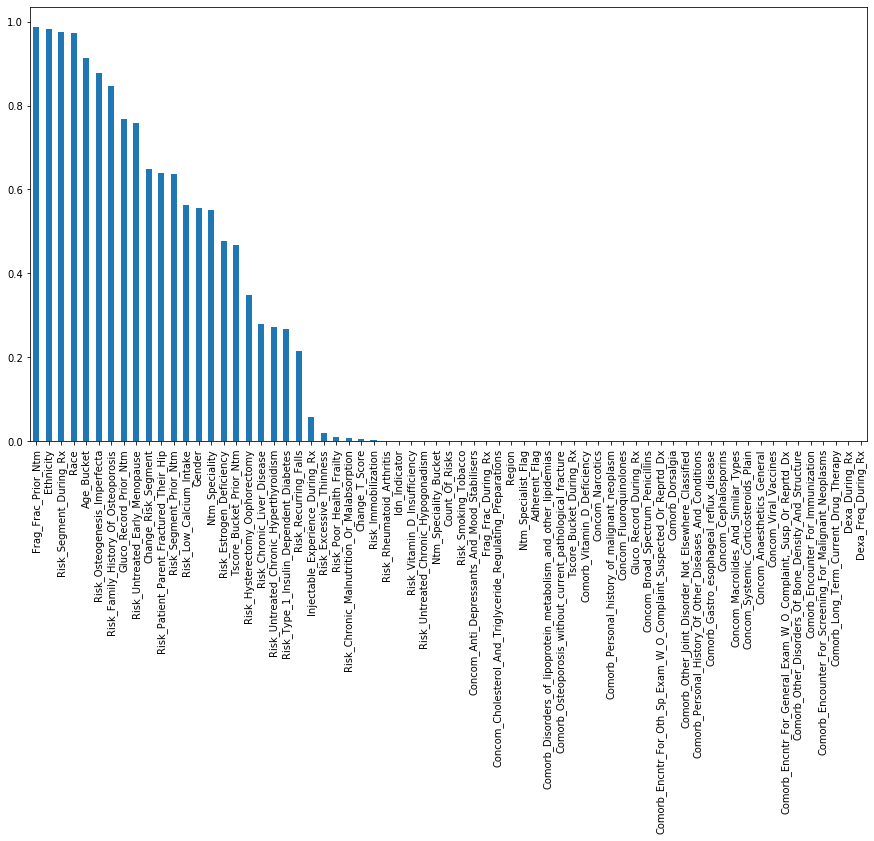

In [19]:
plt.figure(figsize=(15,8))
p_values.plot.bar()

https://github.com/gsampath127/Feature-Selection/blob/master/FeatureSelection_ChiSquareTest.ipynb

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

In [22]:
p_values[p_values > 0.05]

Frag_Frac_Prior_Ntm                        0.986408
Ethnicity                                  0.982106
Risk_Segment_During_Rx                     0.975491
Race                                       0.972452
Age_Bucket                                 0.913194
Risk_Osteogenesis_Imperfecta               0.877471
Risk_Family_History_Of_Osteoporosis        0.846658
Gluco_Record_Prior_Ntm                     0.768253
Risk_Untreated_Early_Menopause             0.757814
Change_Risk_Segment                        0.648001
Risk_Patient_Parent_Fractured_Their_Hip    0.639946
Risk_Segment_Prior_Ntm                     0.636720
Risk_Low_Calcium_Intake                    0.564024
Gender                                     0.556659
Ntm_Speciality                             0.551738
Risk_Estrogen_Deficiency                   0.477640
Tscore_Bucket_Prior_Ntm                    0.468144
Risk_Hysterectomy_Oophorectomy             0.349794
Risk_Chronic_Liver_Disease                 0.279337
Risk_Untreat